# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# The exclamation mark (!) is used to execute shell commands from Jupyter Notebook.
!pip install citipy==0.0.6
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude.  Plots for the following relationships:

## Latitude vs. Temperature
## Latitude vs. Humidity
## Latitude vs. Cloudiness
## Latitude vs. WindSpeed

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

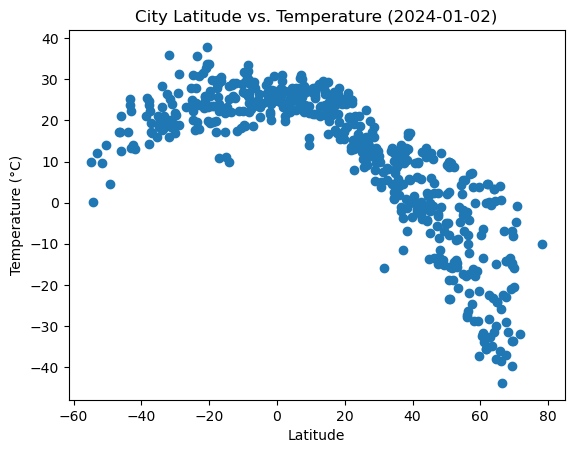

In [8]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")

# Base URL for Weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Lists to store data
latitudes = []
temperatures = []
humidities = []
cloudinesses = []
wind_speeds = []

# Loop through list of cities and make API requests
for city in cities:
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    response = requests.get(query_url)
    weather_data = response.json()

    # Collect data if the request was successful
    if response.status_code == 200:
        latitudes.append(weather_data['coord']['lat'])
        temperatures.append(weather_data['main']['temp'])
        humidities.append(weather_data['main']['humidity'])
        cloudinesses.append(weather_data['clouds']['all'])
        wind_speeds.append(weather_data['wind']['speed'])

# Function to create scatter plots
def create_scatter_plot(x_data, y_data, x_label, y_label, title):
    plt.scatter(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title} ({current_date})")
    plt.show()

# Create scatter plots
create_scatter_plot(latitudes, temperatures, "Latitude", "Temperature (°C)", "City Latitude vs. Temperature")




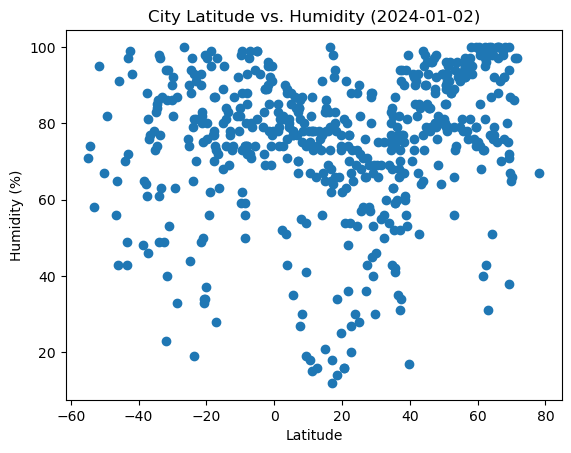

In [9]:
create_scatter_plot(latitudes, humidities, "Latitude", "Humidity (%)", "City Latitude vs. Humidity")

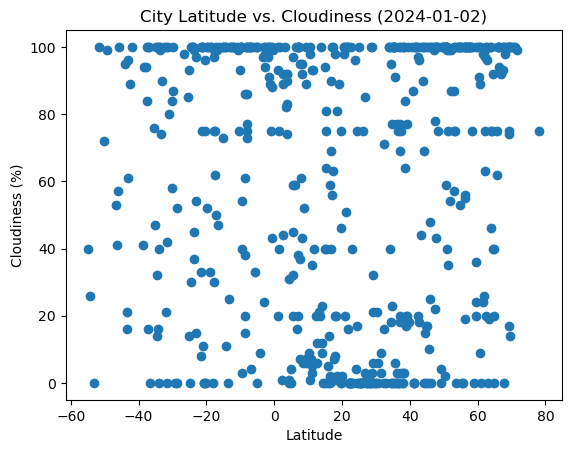

In [10]:
create_scatter_plot(latitudes, cloudinesses, "Latitude", "Cloudiness (%)", "City Latitude vs. Cloudiness")

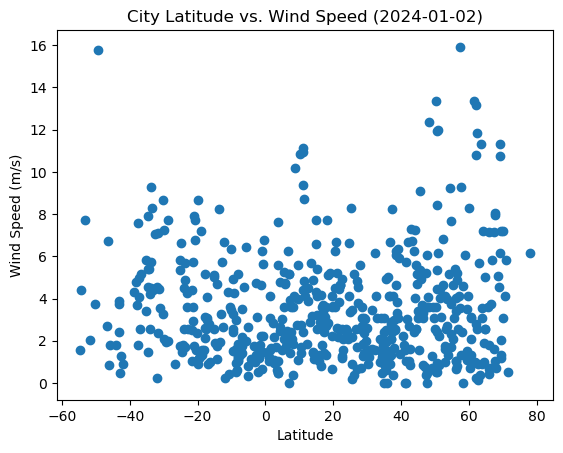

In [11]:
create_scatter_plot(latitudes, wind_speeds, "Latitude", "Wind Speed (m/s)", "City Latitude vs. Wind Speed")

---

## Requirement 2: Compute Seperate Linear Regression for Each of Relationships for the Northern Hemisphere and Southern hemisphere.  

## Northern Hemisphere = Latitude >= 0
## Latitude vs. Temperature
## Latitude vs. Humidity
## Latitude vs. Cloudiness
## Latitude vs. WindSpeed

## Souther Hemisphere = Latitude <= 0

## Latitude vs. Temperature
## Latitude vs. Humidity
## Latitude vs. Cloudiness
## Latitude vs. WindSpeed


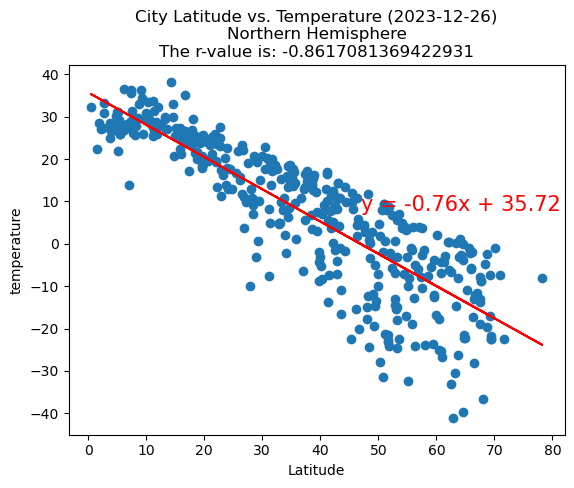

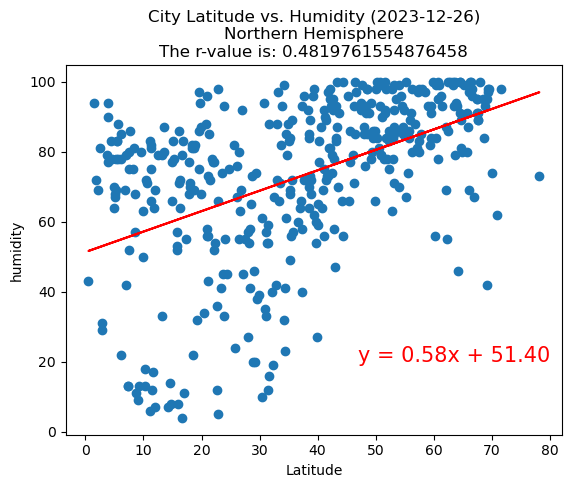

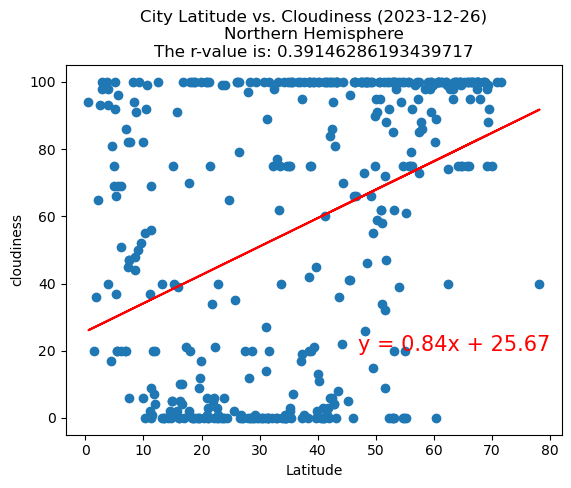

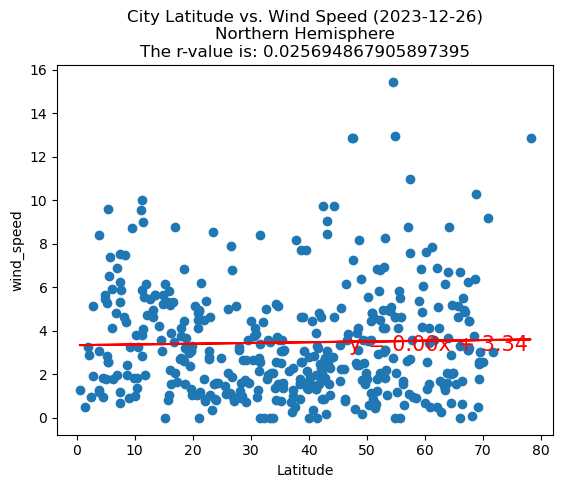

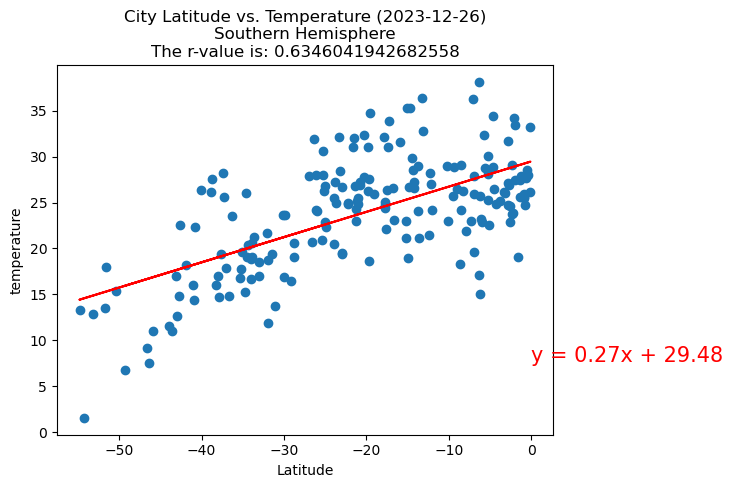

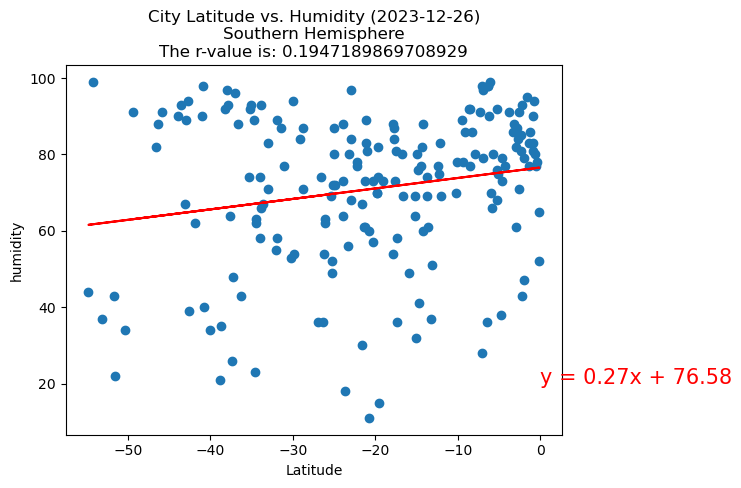

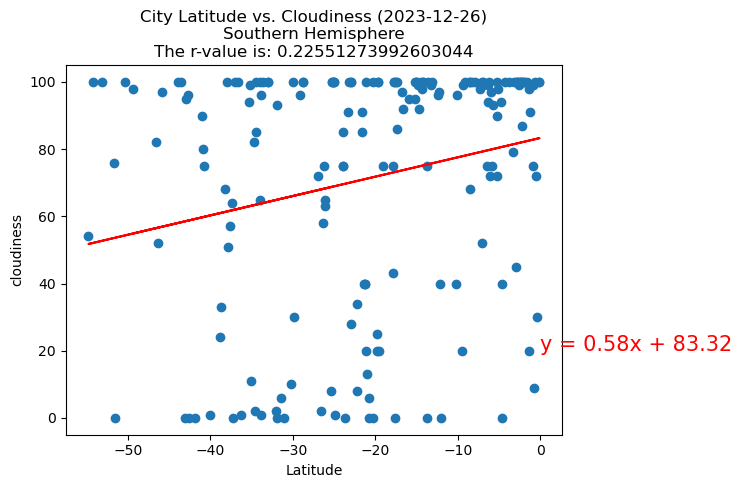

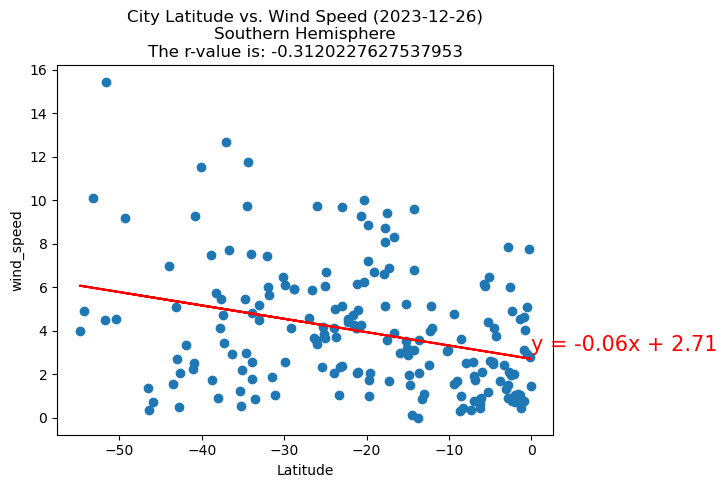

In [16]:
from scipy.stats import linregress

# Function to create scatter plot with linear regression for a given hemisphere
def create_plots_for_hemisphere(hemisphere_data, hemisphere_name):
    for data, y_label, title in hemisphere_data:
        # Perform linear regression
        (slope, intercept, r_value, _, _) = linregress(data['latitude'], data[y_label])
        # Calculate regression values
        regress_values = [slope * x + intercept for x in data['latitude']]
        # Line equation rounded to two decimal places
        line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

        # Create scatter plot
        plt.scatter(data['latitude'], data[y_label])
        plt.plot(data['latitude'], regress_values, "r-")
        plt.annotate(line_eq, (max(data['latitude'])*0.6, max(data[y_label])*0.2), fontsize=15, color="red")
        plt.xlabel("Latitude")
        plt.ylabel(y_label)
        plt.title(f"{title} ({current_date})\n{hemisphere_name} Hemisphere\nThe r-value is: {r_value}")
        plt.show()

# Split data into Northern and Southern Hemisphere
northern_hemi = {'latitude': [], 'temperature': [], 'humidity': [], 'cloudiness': [], 'wind_speed': []}
southern_hemi = {'latitude': [], 'temperature': [], 'humidity': [], 'cloudiness': [], 'wind_speed': []}

for lat, temp, humid, cloud, wind in zip(latitudes, temperatures, humidities, cloudinesses, wind_speeds):
    if lat >= 0:
        northern_hemi['latitude'].append(lat)
        northern_hemi['temperature'].append(temp)
        northern_hemi['humidity'].append(humid)
        northern_hemi['cloudiness'].append(cloud)
        northern_hemi['wind_speed'].append(wind)
    else:
        southern_hemi['latitude'].append(lat)
        southern_hemi['temperature'].append(temp)
        southern_hemi['humidity'].append(humid)
        southern_hemi['cloudiness'].append(cloud)
        southern_hemi['wind_speed'].append(wind)

# Plot data for each hemisphere
hemisphere_data_northern = [
    (northern_hemi, 'temperature', 'City Latitude vs. Temperature'),
    (northern_hemi, 'humidity', 'City Latitude vs. Humidity'),
    (northern_hemi, 'cloudiness', 'City Latitude vs. Cloudiness'),
    (northern_hemi, 'wind_speed', 'City Latitude vs. Wind Speed')
]

hemisphere_data_southern = [
    (southern_hemi, 'temperature', 'City Latitude vs. Temperature'),
    (southern_hemi, 'humidity', 'City Latitude vs. Humidity'),
    (southern_hemi, 'cloudiness', 'City Latitude vs. Cloudiness'),
    (southern_hemi, 'wind_speed', 'City Latitude vs. Wind Speed')
]

create_plots_for_hemisphere(hemisphere_data_northern, "Northern")
create_plots_for_hemisphere(hemisphere_data_southern, "Southern")



###  Temperature vs. Latitude Linear Regression Plot

## The Northern Hemisphere plot for temperature vs. latitude Regression Plot shows a very strong negative linear relationship between Temperature and Latitude.  The R-Value being negative 0.86 is suggests it is very linear. The slope being positive means the farther you get from the equater, the colder it gets.


## The Southern Hemisphere plot for temperature vs. latitude Regression Plot shows a strong positive linear relationship between Temperature and Latitude.  The R-Value being positive 0.63 is suggests it is very linear, but not as strong as the Northern hemisphere.  The slope being positive also suggests the farther you get from the equater, the colder it gets.  I would have thought the Northern and Southern Hemispheres were very similar with R-values very similar.  Possibly, the time of the year makes a difference.  The Northern atmoshere is winter season right now, while the Southern atmosphere is Summer season.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

## The Northern Hemisphere plot for Humidity vs. latitude Regression Plot shows a positive linear relationship between Humidity and Latitude.  The R-Value being positive 0.48 is suggests it is not a strong linear relationship, but the slope does indicate the humidity does increase the farther away from the equater you get.


## The Southern Hemisphere plot for Humidity vs. latitude Regression Plot shows a positive linear relationship between Temperature and Latitude.  The R-Value being positive 0.19 is suggests it is not a strong linear relationship.   Again the difference between Northern and Southern may be, because of the seasons.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

## The Northern Hemisphere plot for Cloudiness vs. latitude Regression Plot shows a positive linear relationship between Humidity and Latitude.  The R-Value being positive 0.39 is suggests it is not a strong linear relationship, but the slope does indicate the humidity does increase the farther away from the equater you get.

## The Southern Hemisphere plot for Cloudiness vs. latitude Regression Plot shows a positive linear relationship between Cloudiness and Latitude.  The closer you get to the equater, the clouder it gets. The R-Value being positive 0.23 is suggests it is not a strong linear relationship.   Again the difference between Northern and Southern may be, because of the seasons.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

## The wind speed does not appear to be related to the Latitude in the Northern Hemisphere.  The very low R-value of .026 suggest there is no linear relationship.

## The wind speed does suggest some negative linear relationship related to Latitude, however with a R-value of -.32, it does not appear to be a strong linear relationship.  Again, I think the difference between North and South Hemispheres may be related to the season.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## The temperature seems to have the greatest linear relationship with distance from the equater.  The farther you get from the equater, the colder it gets.  Only based on distance from equater, I would have thought Northern and Southern were very close. This leads me to believe another factor is involved.  I think it is related to the tilt of the earth in relationship to the sun.  To get a better comparison, it maybe necessary to sample data year around or at least during the 4 seasons of the year for Northern and Southern hemispheres.